# Laboratory 6 - Rootfinding algorithms
#### Grzegorz Fotyga

## 1 Introduction

The goal of the lab is to implement two root-finding algorithms, the bisection method and the secant method, and use them to solve the following two problems:

### Problem 1 
Figure 1 shows a circuit with a resistor, an inductor, and a capacitor in parallel. Kirchhoff’s rules can be used to express the impedance magnitude of the system as follows:

$|Z| = \dfrac{1}{\sqrt{\dfrac{1}{R^2} + (\omega C - \dfrac{1}{\omega L})^2}}  \   \   \   \  (1)$       


where $\omega$ is the angular frequency. Find the $\omega$ that results in an impedance of $75 \Omega$. For the following parameters: R = $725\Omega$, C = 8e−5F, L = 2H, with initial interval $\omega \in \left< 1,50 \right>$  and $\epsilon_f$ = 1e−12.


### Problem 2

The upward velocity of a rocket can be computed by the following formula 

$v = u \text{ln}\left(\dfrac{m_0}{m_0 - qt} \right) - gt     \  \    \  \    (2)$    


where $t$ denotes the time, $v$ is the upward velocity, $m_0$ - the initial mass of the rocket at time $t = 0$, $u$ - the velocity at which fuel is expelled relative to the rocket, $q$ - the fuel consumption rate, $g = 9.81m/s^2$ - the downward acceleration of gravity. Compute the time, at which $v = 750m/s$, assuming $m_0 = 150000kg$, $q = 2700kg/s$, $u = 2000m/s$. Set the initial interval to: $t \in \left< 1, 50 \right>$, and the tolerance to: $\epsilon_f$ = 1e−12.



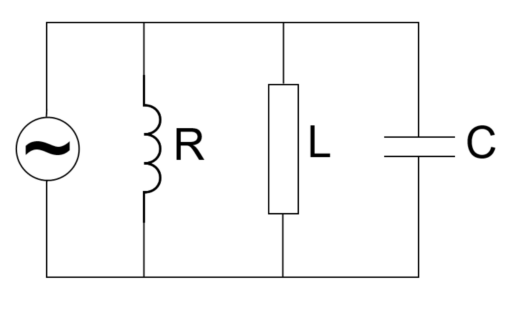

In [136]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('circuit.png')
imgplot = plt.imshow(img)
plt.axis('off')  
plt.show()

### Task 1

- Define a function whose input parameter is $\omega$ and output parameter is impedance $Z$, based on formula (1).
- Define a function whose input parameter is a time $t$ and output parameter is velocity $v$, based on formula (2).


In [137]:
import math

In [138]:
R = 725
C = 8e-5
L = 2
omega_left = 1
omega_right = 50

def impedance(omega):
    return 1 / math.sqrt((1 / math.pow(R, 2)) + math.pow(((omega * C) - (1 / (omega * L))), 2))

In [139]:
g = 9.81
v = 750
m0 = 150000
q = 2700
u = 2000
t_left = 1
t_right = 50

def velocity(t):
    return u * math.log(m0 / (m0 - q * t)) - g * t

In [140]:
epsilon = 1e-12

### Task 2

Implement bisection algorithm in a form of a function with the following input parameters: 
- initial interval - floats: $a$ and $b$ 
- tolerance: $\epsilon_f = 1e-12$ 

Specify two stopping criterions:
- absolute value of a function in the middle of subregion will drop below $\epsilon_f$
or:
- width of subregion drops below $\epsilon_f$

Output of a function:
- root
- number of iterations

Test your bisection algorithm on a simple function (suggest one!)

In [141]:
def bisection(f, left, right):
    abs_values = []
    i = 0
    while True:
        i += 1

        mid = (left + right) / 2
        f_of_mid = f(mid)

        abs_f_of_mid = abs(f_of_mid)
        abs_values.append(abs_f_of_mid)

        if abs_f_of_mid < epsilon or abs(right - left) < epsilon:
            return mid, i, abs_values
        
        if f(left) * f_of_mid < 0:
            right = mid
        else:
            left = mid

In [142]:
def arctan_minus_1(x):
    return math.atan(x) - 1 # The root is ~1.55741

In [143]:
root_bisection, i_bisection, _ = bisection(arctan_minus_1, -5, 5)

print(f'Bisection method converged after {i_bisection} iterations')
print(f'Root of y = arctan(x) - 1: {root_bisection}')

Bisection method converged after 41 iterations
Root of y = arctan(x) - 1: 1.5574077246537854


### Task 3

Implement secant algorithm in a form of a function with the following input parameters: 
- the first two points - floats: $a$ and $b$ 
- tolerance: $\epsilon_f = 1e-12$ 

Specify a stopping criterion:
- absolute value of a function in the current point will drop below $\epsilon_f$

Output of a function:
- root
- number of iterations

Test your secant algorithm on a simple function (suggest one!)

In [144]:
def secant(f, left, right):
    abs_values = []
    i = 0
    while True:
        i += 1

        f_of_left = f(left)
        f_of_right = f(right)
        
        abs_f_of_right = abs(f_of_right)
        abs_values.append(abs_f_of_right)

        if abs_f_of_right < epsilon:
            return right, i, abs_values

        x_next = right - f_of_right * (right - left) / (f_of_right - f_of_left)

        left, right = right, x_next

In [145]:
root_secant, i_secant, _ = secant(arctan_minus_1, -5, 5)

print(f'Secant method converged after {i_secant} iterations')
print(f'Root of y = arctan(x) - 1: {root_secant}')

Secant method converged after 13 iterations
Root of y = arctan(x) - 1: 1.5574077246549023


### Task 4

Test your algorithms on the real problems specified in the previous points. How many iterations did each method take to converge? What is the value of $\omega$ and $t$ you are looking for?

#### Impedance

We want to find $\omega$ such that $Z(\omega) = 75\Omega$, therefore we need to offset the values of the original function:

In [146]:
def impedance_minus_75(omega):
    return impedance(omega) - 75

In [147]:
root_bisection, i_bisection, impedance_abs_values_bisection = bisection(impedance_minus_75, omega_left, omega_right)

print(f'Bisection method converged after {i_bisection} iterations')
print(f'omega = {root_bisection}')

root_secant, i_secant, impedance_abs_values_secant = secant(impedance_minus_75, omega_left, omega_right)

print(f'Secant method converged after {i_secant} iterations')
print(f'omega = {root_secant}')

Bisection method converged after 46 iterations
omega = 31.656891705126483
Secant method converged after 8 iterations
omega = 31.656891705126682


#### Velocity

We want to find $t$ such that $v(t) = 750m/s$, therefore we need to offset the values of the original function:

In [148]:
def velocity_minus_750(t):
    return velocity(t) - 750

In [149]:
root_bisection, i_bisection, velocity_abs_values_bisection = bisection(velocity_minus_750, t_left, t_right)

print(f'Bisection method converged after {i_bisection} iterations')
print(f't = {root_bisection}')

root_secant, i_secant, velocity_abs_values_secant = secant(velocity_minus_750, t_left, t_right)

print(f'Secant method converged after {i_secant} iterations')
print(f't = {root_secant}')

Bisection method converged after 47 iterations
t = 21.13241513592606
Secant method converged after 9 iterations
t = 21.132415135926294


### Task 5

As the output data in the Bisection and Secant algorithms, add a vector storing subsequent absolute values of the function (in subsequent root approximations). Plot this vector. What can you say about the convergence?

Hint: In subsequent iterations, you compute approximate values of the root as well as the absolute values of the analyzed function at these points. The goal here is to plot (using the plt.semilogy() function) the absolute values of the function. For the last iteration, it should be below 1e-12.

Focus on the convergence rate. Is it linear? Quadratic? Compare it with the results shown in the lecture slides.

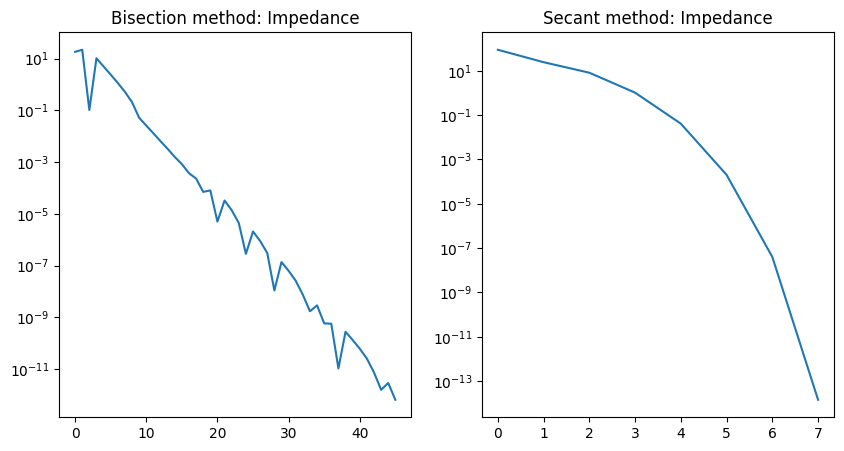

In [150]:
_, (plot_bisection, plot_secant) = plt.subplots(1, 2, figsize=(10, 5))

plot_bisection.semilogy(impedance_abs_values_bisection)
plot_bisection.set_title('Bisection method: Impedance')

plot_secant.semilogy(impedance_abs_values_secant)
plot_secant.set_title('Secant method: Impedance')

plt.show()

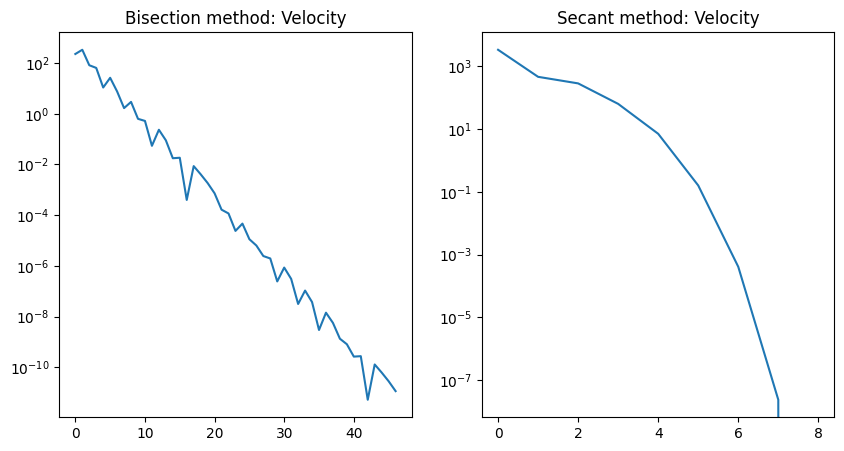

In [151]:
_, (plot_bisection, plot_secant) = plt.subplots(1, 2, figsize=(10, 5))

plot_bisection.semilogy(velocity_abs_values_bisection)
plot_bisection.set_title('Bisection method: Velocity')

plot_secant.semilogy(velocity_abs_values_secant)
plot_secant.set_title('Secant method: Velocity')

plt.show()